<h1 style="text-align:center; color:red;">Exercise XP</h1>

<h1 style="text-align:left; color:green;">Exercise 1: Duplicate Detection and Removal
</h1>

In [3]:
import pandas as pd
df_1 = pd.read_csv(r"C:\Users\pc\Downloads\titanic dataset\gender_submission.csv")
df_2 = pd.read_csv(r"C:\Users\pc\Downloads\titanic dataset\test.csv")
df_3 = pd.read_csv(r"C:\Users\pc\Downloads\titanic dataset\train.csv")

In [4]:
print(df_1.columns)
df_1.head()

Index(['PassengerId', 'Survived'], dtype='object')


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df_1.shape

(418, 2)

In [6]:
print(df_2.columns)
df_2.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_2.shape

(418, 11)

In [8]:
print(df_3.columns)
df_3.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_3.shape

(891, 12)

In [10]:
identiques = df_1["PassengerId"].equals(df_2["PassengerId"])
identiques

True

In [11]:
#pour ne pas prendre en charge l'ordre
identiques_sans_ordre = df_1["PassengerId"].sort_values().equals(df_2["PassengerId"].sort_values())
identiques_sans_ordre

True

In [12]:
merged_df = pd.merge(df_1, df_2, on="PassengerId", how="inner") 

In [13]:
merged_df.shape

(418, 12)

In [14]:
same_columns = list(merged_df.columns) == list(df_3.columns)
same_columns

True

In [15]:
#Si les colonnes ne sont pas identiques
diff_1 = set(merged_df.columns) - set(df_3.columns)
diff_2 = set(merged_df.columns) - set(df_3.columns)
print(diff_1)
print(diff_2)

set()
set()


In [16]:
df = pd.concat([merged_df, df_3], ignore_index=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.shape

(1309, 12)

In [18]:
duplicates = df[df.duplicated()]
duplicates.shape

(0, 12)

In [19]:
#supposons que nous avons des lignes dupliqués
df = df.drop_duplicates()

In [20]:
df.shape

(1309, 12)

<h1 style="text-align:left; color:green;">Exercise 2: Handling Missing Values
</h1>

In [22]:
col_missing=df.isnull().sum()
col_missing

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
print(col_missing[col_missing > 0])

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [24]:
df = df.dropna(subset=["Embarked"])
df.shape

(1307, 12)

In [25]:
col_missing=df.isnull().sum()
col_missing

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [26]:
df_temp = df[['Age', 'Cabin', 'Fare']].copy()
df_temp.info()
df_temp.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1044 non-null   float64
 1   Cabin   293 non-null    object 
 2   Fare    1306 non-null   float64
dtypes: float64(2), object(1)
memory usage: 40.8+ KB


,Age,Fare
count,1044.000000,1306.000000
mean,29.842596,33.223956
std,14.390739,51.765986
min,0.170000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


In [27]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69', 'D47',
       'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80', 'A31',
       'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99',
       'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124', 'C91

In [28]:
df['Cabin'].unique().shape

(186,)

In [29]:
df['Cabin'] =  df['Cabin'].fillna(df['Cabin'].mode()[0])

In [30]:
 df['Age'] =  df['Age'].fillna(df['Age'].median())

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[["Fare"]] = imputer.fit_transform(df[["Fare"]])


In [32]:
col_missing=df.isnull().sum()
col_missing

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
#pour essayer KNNImputer

col_missing=df_temp.isnull().sum()
col_missing

Age       263
Cabin    1014
Fare        1
dtype: int64

In [34]:
#il faut lancer le KNNimputer sur l'ensemble des colonnes au meme temps pour profiter du calcul multi-variable
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_temp[["Age","Fare"]] = imputer.fit_transform(df_temp[["Age","Fare"]])

In [35]:
 
col_missing=df_temp.isnull().sum()
col_missing

Age         0
Cabin    1014
Fare        0
dtype: int64

<h1 style="text-align:left; color:green;">Exercise 3: Feature Engineering
</h1>

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C23 C25 C27,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C23 C25 C27,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C23 C25 C27,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C23 C25 C27,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C23 C25 C27,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     1307 non-null   int64  
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.7+ KB


In [40]:
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'Family Size']].head()

,SibSp,Parch,Family Size
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


In [41]:
df["Title"] = df["Name"].str.extract(r",\s*([^\.]*)\.", expand=False)
df["Title"] = df["Title"].str.strip()

In [42]:
df[['Name', 'Title']].head()

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


In [43]:
df['Title'].nunique()

18

In [44]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona',
       'Don', 'Mme', 'Major', 'Lady', 'Sir', 'Mlle', 'Capt',
       'the Countess', 'Jonkheer'], dtype=object)

In [45]:
df['Title'].value_counts()

Title
Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
the Countess      1
Capt              1
Don               1
Lady              1
Mme               1
Dona              1
Jonkheer          1
Name: count, dtype: int64

In [46]:
df["Title"] = df["Title"].replace({
    "Ms": "Miss",
    "Mlle": "Miss",
    "Mme": "Mrs",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "the Countess": "Mrs",
    "Dona": "Mrs",
    "Dr": "Mr",
    "Col": "Mr",
    "Major": "Mr",
    "Rev": "Mr",
    "Sir": "Mr",
    "Capt": "Mr",
    "Don": "Mr",
    "Jonkheer": "Mr"
})


In [47]:
df['Title'].value_counts()

Title
Mr        783
Miss      263
Mrs       200
Master     61
Name: count, dtype: int64

In [48]:
df_before_encoding = df.copy()

In [49]:
#one-hot encoding
df = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family Size,Title,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,C23 C25 C27,1,Mr,True,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,C23 C25 C27,2,Mrs,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,C23 C25 C27,1,Mr,True,True,False
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,C23 C25 C27,1,Mr,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,C23 C25 C27,3,Mrs,False,False,True


In [51]:
df_2["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Title"] = le.fit_transform(df["Title"])

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family Size,Title,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,C23 C25 C27,1,2,True,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,C23 C25 C27,2,3,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,C23 C25 C27,1,2,True,True,False
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,C23 C25 C27,1,2,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,C23 C25 C27,3,3,False,False,True


<h1 style="text-align:left; color:green;">Exercise 4: Outlier Detection and Handling
</h1>

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family Size,Title,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,C23 C25 C27,1,2,True,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,C23 C25 C27,2,3,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,C23 C25 C27,1,2,True,True,False
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,C23 C25 C27,1,2,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,C23 C25 C27,3,3,False,False,True


In [56]:
len(df.columns)

15

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family Size', 'Title', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [58]:
dataframe_visualizer = df[['Age', 'SibSp', 'Parch', 'Fare', 'Family Size']]

In [59]:
dataframe_visualizer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1307 non-null   float64
 1   SibSp        1307 non-null   int64  
 2   Parch        1307 non-null   int64  
 3   Fare         1307 non-null   float64
 4   Family Size  1307 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 61.3 KB


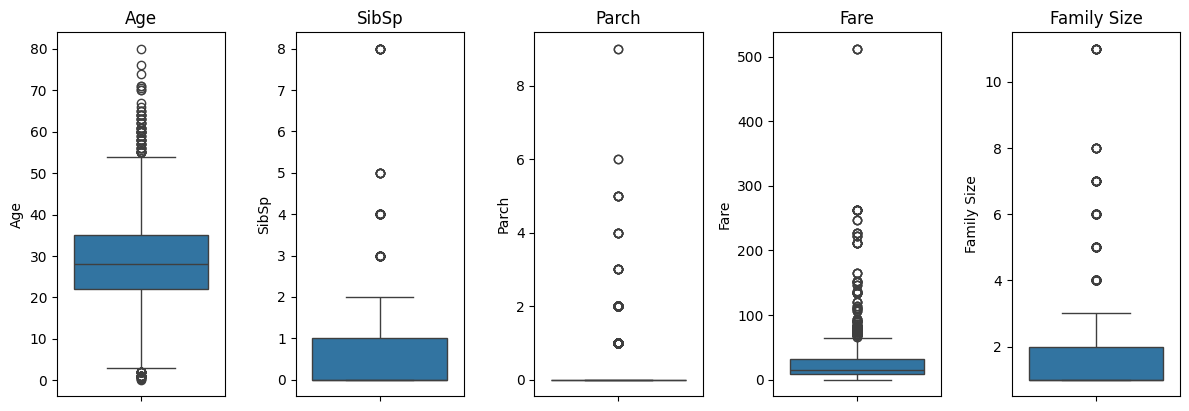

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
columns_to_plot = [
i for i in dataframe_visualizer.columns
]

# Créer un boxplot pour chaque colonne
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 5, i)   
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### on fait gérer les outliers via ( quantile capping, log transformation, row removal) juste sur age et fare puisque se sont des variables continues, le reste (familysize, sibSp et parch) car ce sont des variables discrètes avec peu de valeurs possibles, et les "extrêmes" sont légitimes, donc fait ces transformations juste sur les variables continues.

In [62]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]
print("Outliers: ", len(outliers))
# Filtrer les données
#df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Outliers:  100


In [63]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)]
print("Outliers: ", len(outliers))
# Filtrer les données
#df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

Outliers:  169


#### Quantile capping

In [65]:
import numpy as np

cap_fare = df["Fare"].quantile(0.98)
df["Fare_capped"] = np.where(df["Fare"] > cap_fare, cap_fare, df["Fare"])

cap_age = df["Age"].quantile(0.98)
df["Age_capped"] = np.where(df["Age"] > cap_age, cap_age, df["Age"])

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family Size', 'Title', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Fare_capped', 'Age_capped'],
      dtype='object')

### Log transformation

In [68]:
df["Fare_log"] = np.log1p(df["Fare"])  # log(1+Fare)
df["Age_log"] = np.log1p(df["Age"])

### Row removal

In [73]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_removed = df[(df["Fare"] <= upper_bound) & (df["Fare"] >= lower_bound)]



Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_removed = df[(df["Age"] <= upper_bound) & (df["Age"] >= lower_bound)]


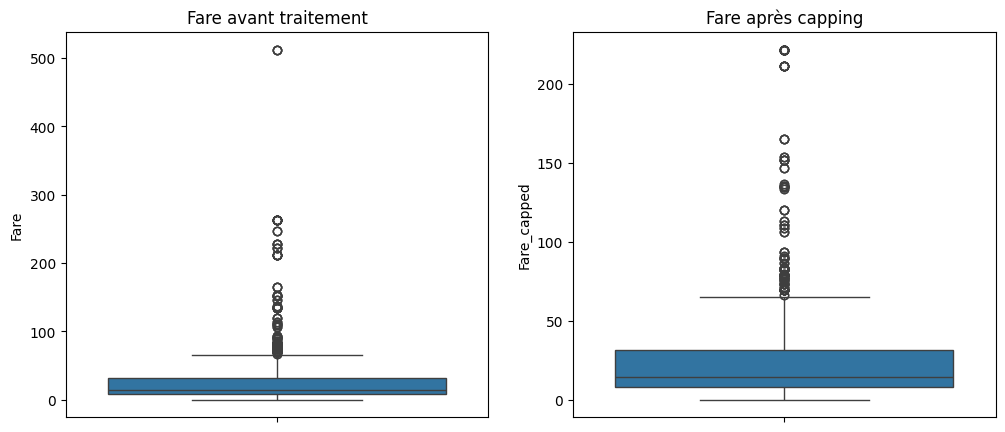

In [71]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Fare"])
plt.title("Fare avant traitement")

plt.subplot(1,2,2)
sns.boxplot(y=df["Fare_capped"])
plt.title("Fare après capping")
plt.show()

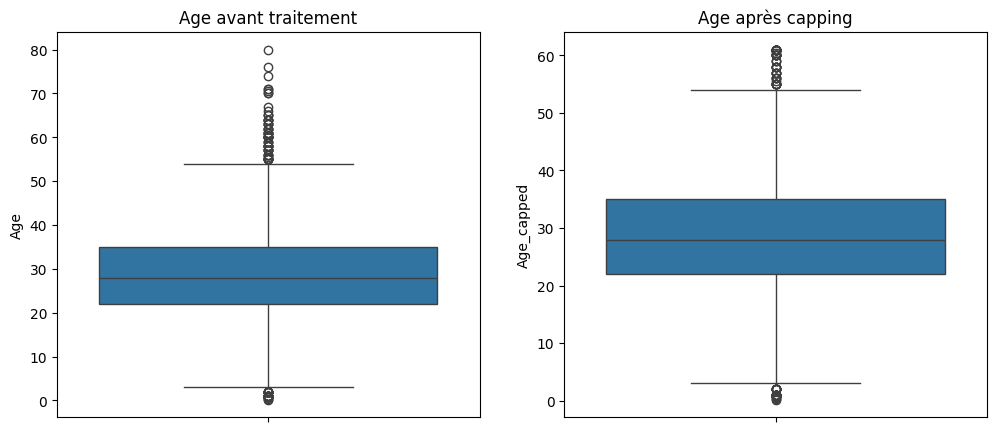

In [75]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Age"])
plt.title("Age avant traitement")

plt.subplot(1,2,2)
sns.boxplot(y=df["Age_capped"])
plt.title("Age après capping")
plt.show()

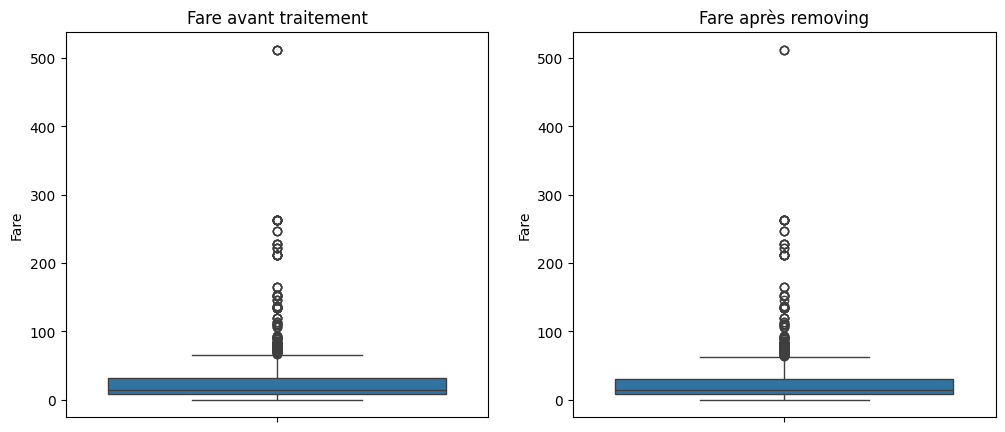

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Fare"])
plt.title("Fare avant traitement")

plt.subplot(1,2,2)
sns.boxplot(y=df_removed["Fare"])
plt.title("Fare après removing")
plt.show()

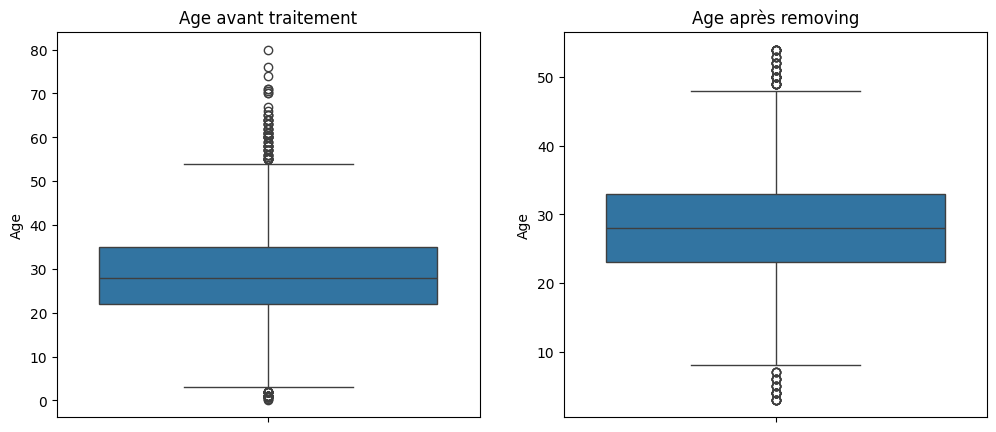

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Age"])
plt.title("Age avant traitement")

plt.subplot(1,2,2)
sns.boxplot(y=df_removed["Age"])
plt.title("Age après removing")
plt.show()

<h1 style="text-align:left; color:green;">Exercise 5: Data Standardization and Normalization
</h1>

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     1307 non-null   int64  
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Ticket       1307 non-null   object 
 8   Fare         1307 non-null   float64
 9   Cabin        1307 non-null   object 
 10  Family Size  1307 non-null   int64  
 11  Title        1307 non-null   int32  
 12  Sex_male     1307 non-null   bool   
 13  Embarked_Q   1307 non-null   bool   
 14  Embarked_S   1307 non-null   bool   
 15  Fare_capped  1307 non-null   float64
 16  Age_capped   1307 non-null   float64
 17  Fare_log     1307 non-null   float64
 18  Age_log      1307 non-null   float64
dtypes: bool(3), 

#### on ne normalise pas les colonnes catégorielles ni les identifiants

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Créer les scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# StandardScaler pour Age (variables normalement distribuées, Rend les features comparables en termes d’échelle.)
df["Age_scaled"] = scaler_standard.fit_transform(df[["Age_capped"]])

# MinMaxScaler pour Fare (variables fortement asymétriques ou bornées, - Conserve la forme de la distribution mais ramène toutes les valeurs dans [0,1].

df["Fare_scaled"] = scaler_minmax.fit_transform(df[["Fare_capped"]])

# Optionnel : MinMaxScaler pour SibSp, Parch, Family Size
df[["SibSp_scaled", "Parch_scaled", "FamilySize_scaled"]] = scaler_minmax.fit_transform(
    df[["SibSp", "Parch", "Family Size"]]
)

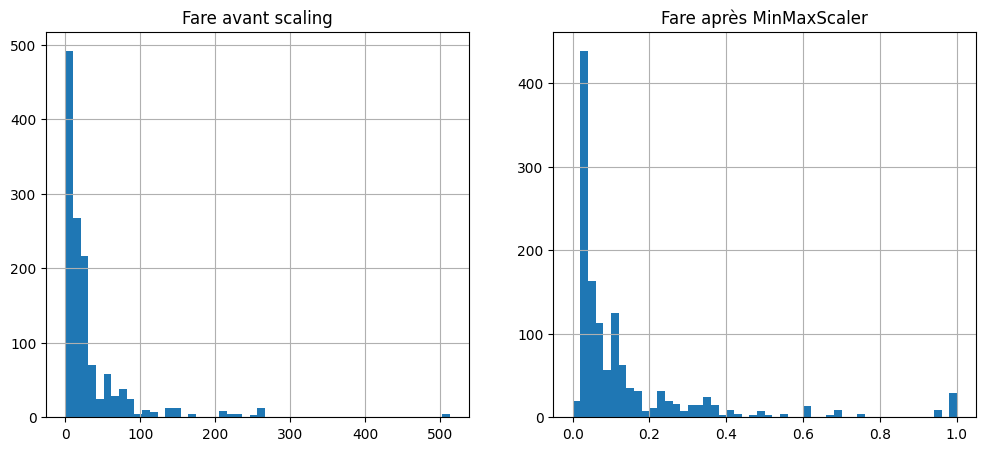

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df["Fare"].hist(bins=50)
plt.title("Fare avant scaling")

plt.subplot(1,2,2)
df["Fare_scaled"].hist(bins=50)
plt.title("Fare après MinMaxScaler")
plt.show()

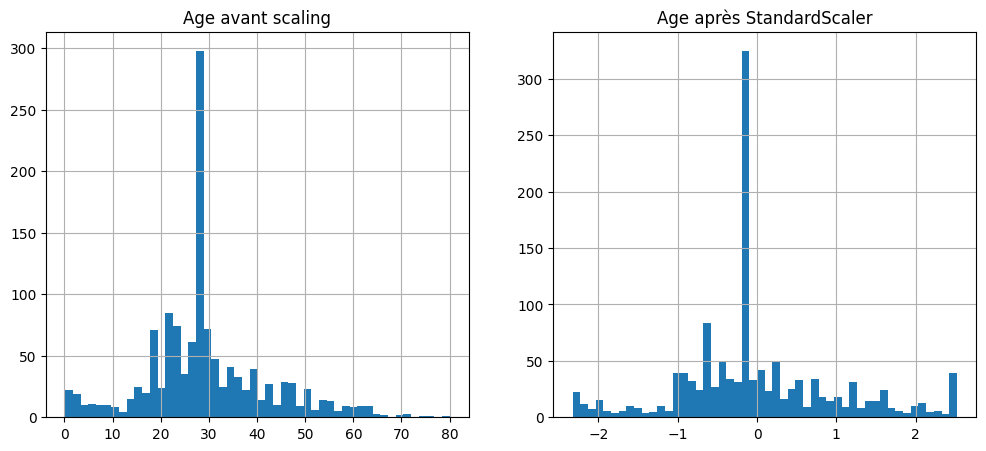

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df["Age"].hist(bins=50)
plt.title("Age avant scaling")

plt.subplot(1,2,2)
df["Age_scaled"].hist(bins=50)
plt.title("Age après StandardScaler")
plt.show()

<h1 style="text-align:left; color:green;">Exercise 7: Data Transformation for Age Feature
</h1>

In [97]:
bins = [0, 12, 18, 60, 100]
labels = ["Child", "Teen", "Adult", "Senior"]

df["AgeGroup"] = pd.cut(df["Age_capped"], bins=bins, labels=labels, right=False)

In [99]:
df["AgeGroup"].value_counts()

AgeGroup
Adult     1114
Child       91
Teen        63
Senior      39
Name: count, dtype: int64

In [101]:
df = pd.get_dummies(df, columns=["AgeGroup"], prefix="AgeGroup")

In [103]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Family Size', 'Title', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Fare_capped', 'Age_capped', 'Fare_log',
       'Age_log', 'Age_scaled', 'Fare_scaled', 'SibSp_scaled', 'Parch_scaled',
       'FamilySize_scaled', 'AgeGroup_Child', 'AgeGroup_Teen',
       'AgeGroup_Adult', 'AgeGroup_Senior'],
      dtype='object')